# Shortest Paths and Dijkstra's Algorithm

In [88]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [89]:
G = nx.Graph()
G.add_edge(0, 1, weight=4)
G.add_edge(0, 8, weight=13)
G.add_edge(1, 2, weight=5)
G.add_edge(1, 4, weight=7)
G.add_edge(2, 3, weight=9)
G.add_edge(2, 6, weight=6)
G.add_edge(2, 8, weight=2)
G.add_edge(3, 6, weight=16)
G.add_edge(3, 7, weight=9)
G.add_edge(4, 5, weight=1)
G.add_edge(4, 8, weight=5)
G.add_edge(5, 6, weight=2)
G.add_edge(5, 8, weight=6)
G.add_edge(6, 7, weight=10)
G.add_edge(1, 7, weight=7)
G.add_edge(6, 8, weight=5)

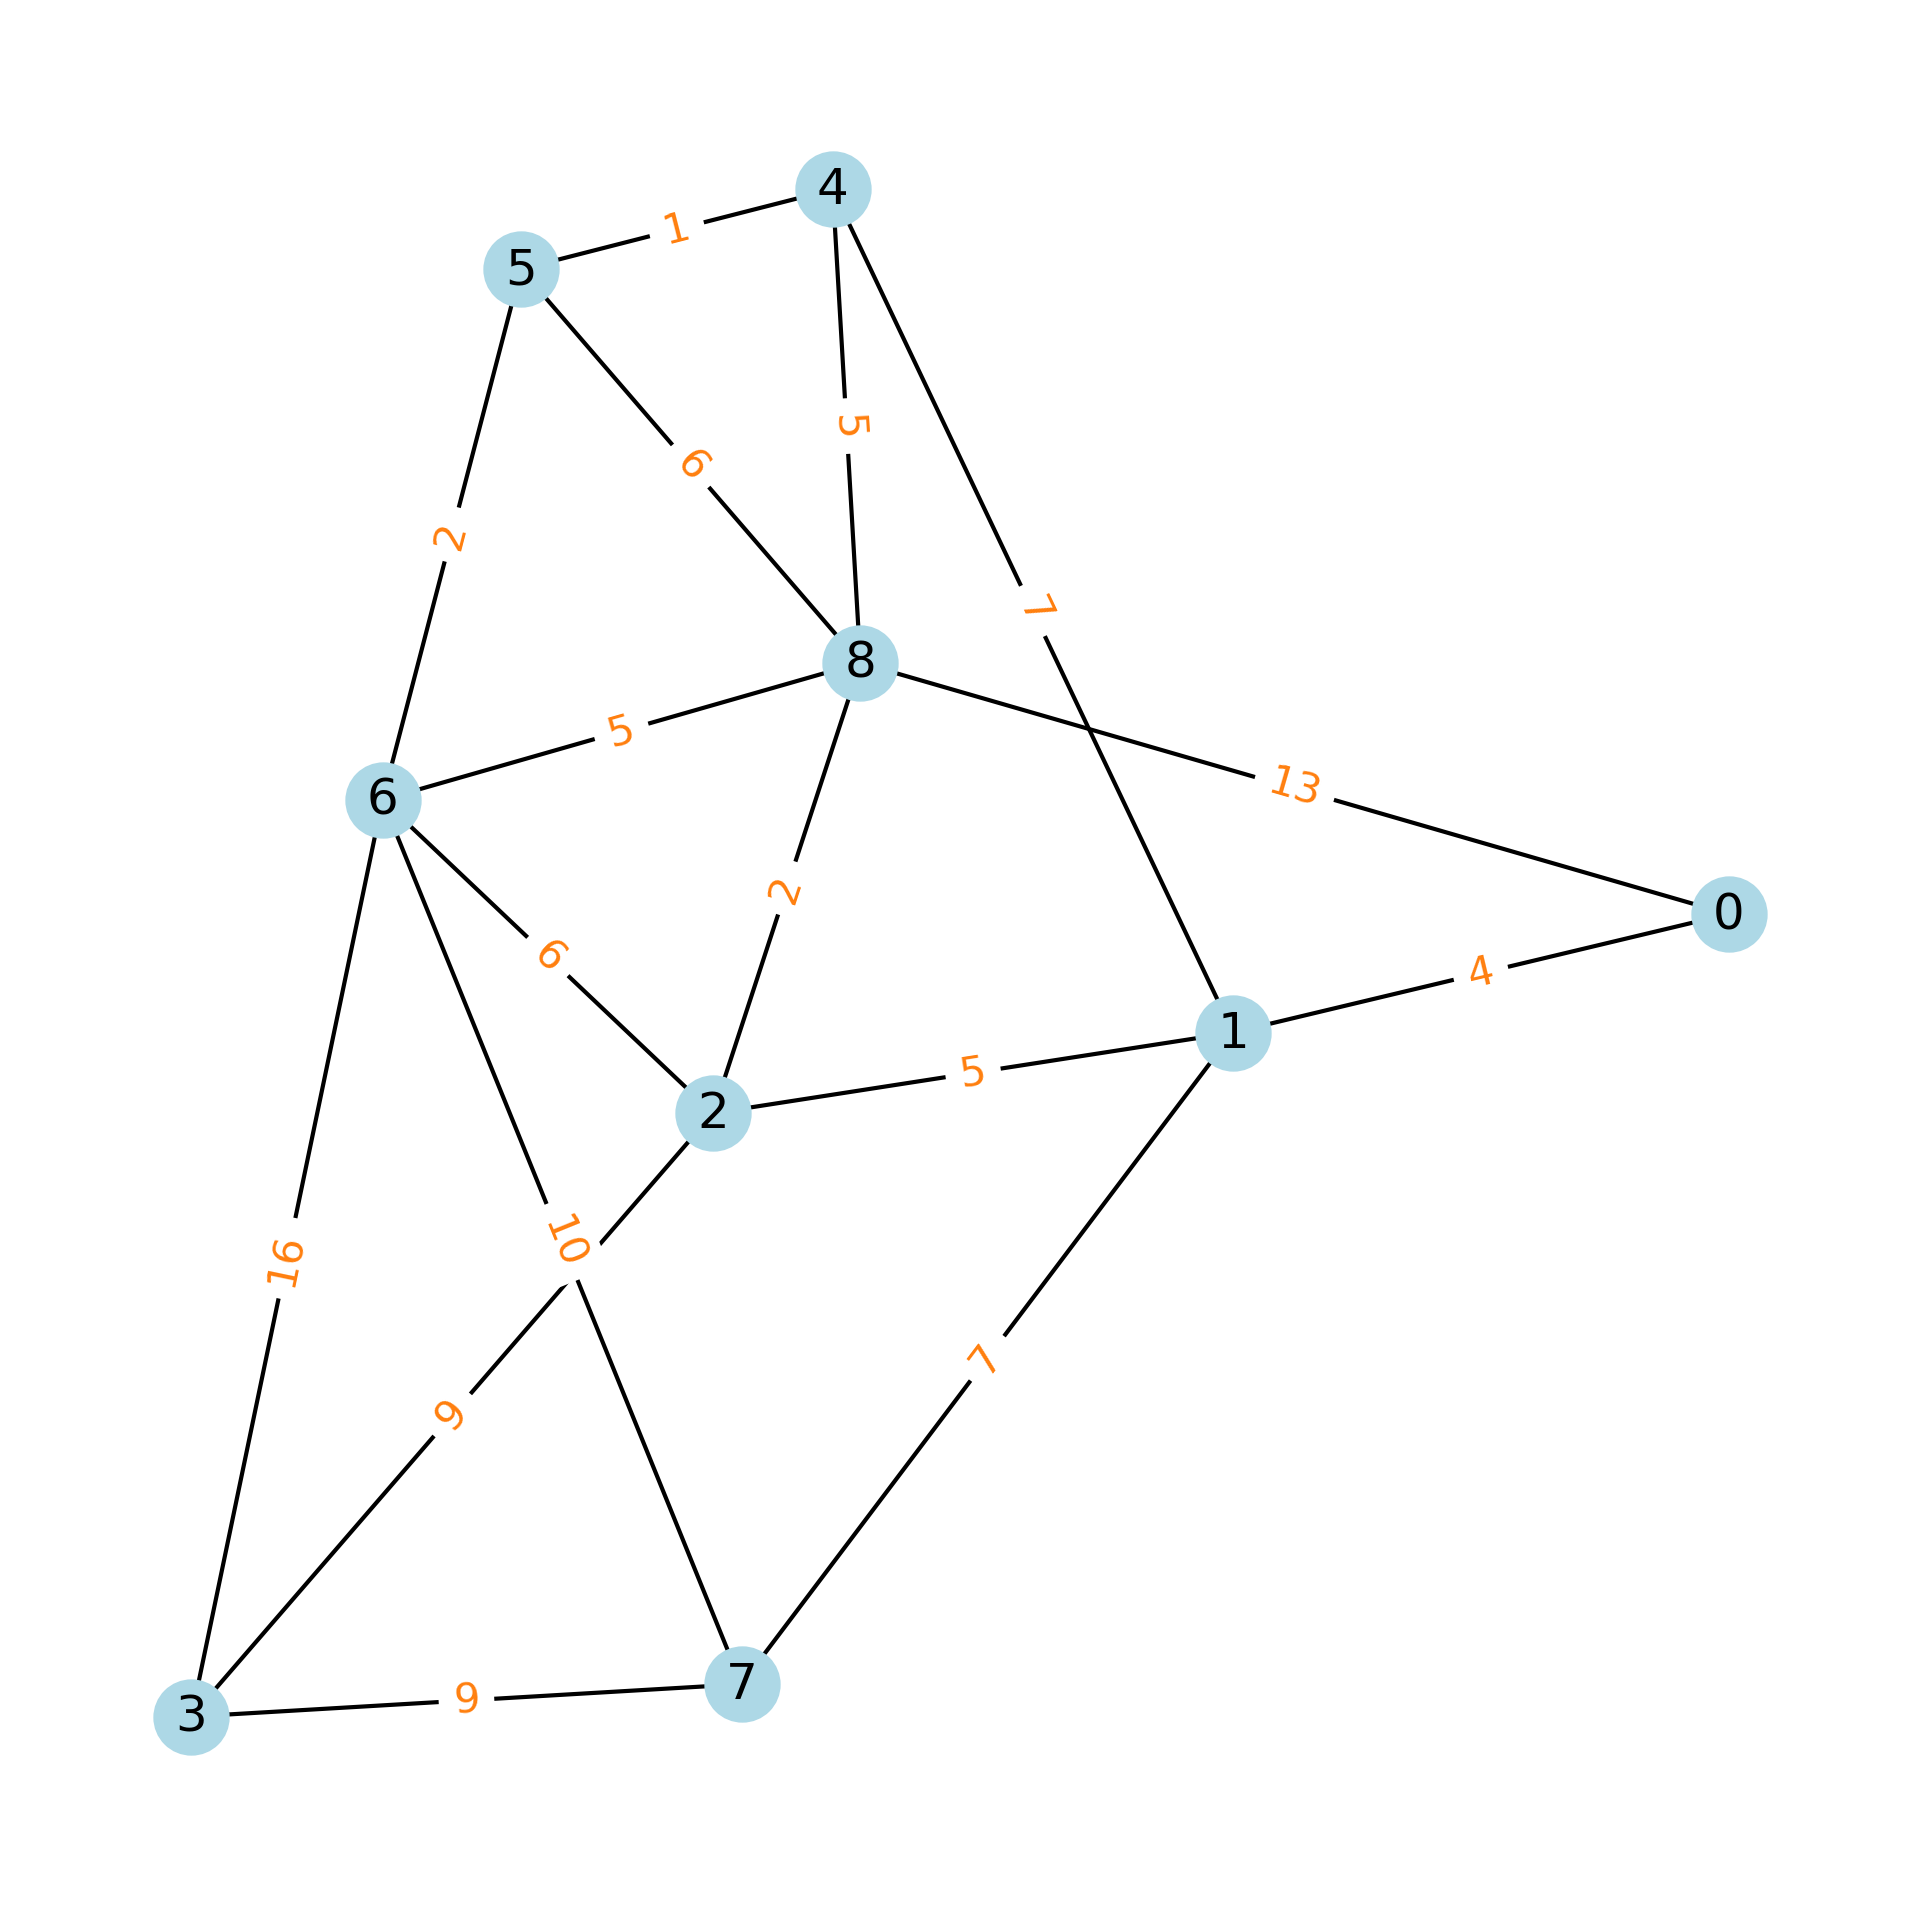

In [90]:
def convert_predecessors_to_edges(predecessors: dict[int, int]):
    
    edges = []
    for v in predecessors:
        u = predecessors[v]
        if u is not None:
            edges.append((u, v))
    return edges

def draw_graph(
        G: nx.Graph, 
        predecessors: dict[int, int] = None,
        seed=0
    ):
    
    # figure config
    fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
    
    # determine layout based on edge weights
    total_weight = sum(map(
        lambda edge : G.edges[edge]["weight"],
        G.edges
    ))
    for edge in G.edges:
        G.edges[edge]["force"] = total_weight / G.edges[edge]["weight"]
    pos = nx.spring_layout(
        G,
        weight="force",
        scale=10,
        seed=seed
    )
    
    # draw nodes
    nx.draw_networkx_nodes(
        G, pos, 
        ax=ax,
        node_color="lightblue"
    )
    nx.draw_networkx_labels(
        G, pos,
        ax=ax
    ),
    
    # draw edges
    
    # edges on shortest paths
    if predecessors is not None:
        tree_edges = convert_predecessors_to_edges(predecessors)
    else:
        tree_edges = []
    
    # remaining edges
    edges = []
    for edge in G.edges:
        u, v = edge
        if (u, v) not in tree_edges and (v, u) not in tree_edges:
            edges.append(edge)
            
    # draw edges
    nx.draw_networkx_edges(
        G, pos, 
        ax=ax,
        edgelist=edges
    )
    nx.draw_networkx_edges(
        G, pos, 
        ax=ax,
        edgelist=tree_edges,
        edge_color="red",
        style="--",
        label="shortest paths"
    )
    
    # edge weights
    nx.draw_networkx_edge_labels(
        G, pos,
        ax=ax,
        edge_labels={edge: G.edges[edge]["weight"] for edge in G.edges},
        font_weight="normal",
        font_color="C1",
    )
    ax.axis("off")
    if tree_edges:
        ax.legend()
    plt.show()

draw_graph(G)

In [91]:
def first_attempt(G: nx.Graph, u0: int):
    
    # initialization
    S = {u0}
    D = {u0: 0}
    PI = {}
    V = set(G.nodes)

    for j in range(len(V) - 1):
        d_  = np.inf 
        u_ = None
        v_ = None
        for u in S:
            for v in V - S:
                if G.has_edge(u, v):
                    d = D[u] + G.edges[u, v]["weight"]
                    if d < d_:
                        u_ = u
                        v_ = v 
                        d_ = d 
                    
        if d_ == np.inf:
            return D, PI
        
        D[v_] = d_ 
        PI[v_] = u_
        S.add(v_)

    return D, PI

In [92]:
def dijkstra(G: nx.Graph, u: int):
    
    # initialization
    S = {u}
    D = {u: 0}
    P = {u: None}
    V = set(G.nodes)
    for v in V:
        D[v] = np.inf
    D[u] = 0
    
    for j in range(len(V) - 1):
        d_  = np.inf 
        v_ = None
        for v in V - S:
            if G.has_edge(u, v):
                d = D[u] + G.edges[u, v]["weight"]
                if d < D[v]:
                    D[v] = d
                    P[v] = u
            if D[v] < d_:
                d_ = D[v]
                v_ = v 
        S.add(v_)
        u = v_
    
    return D, P

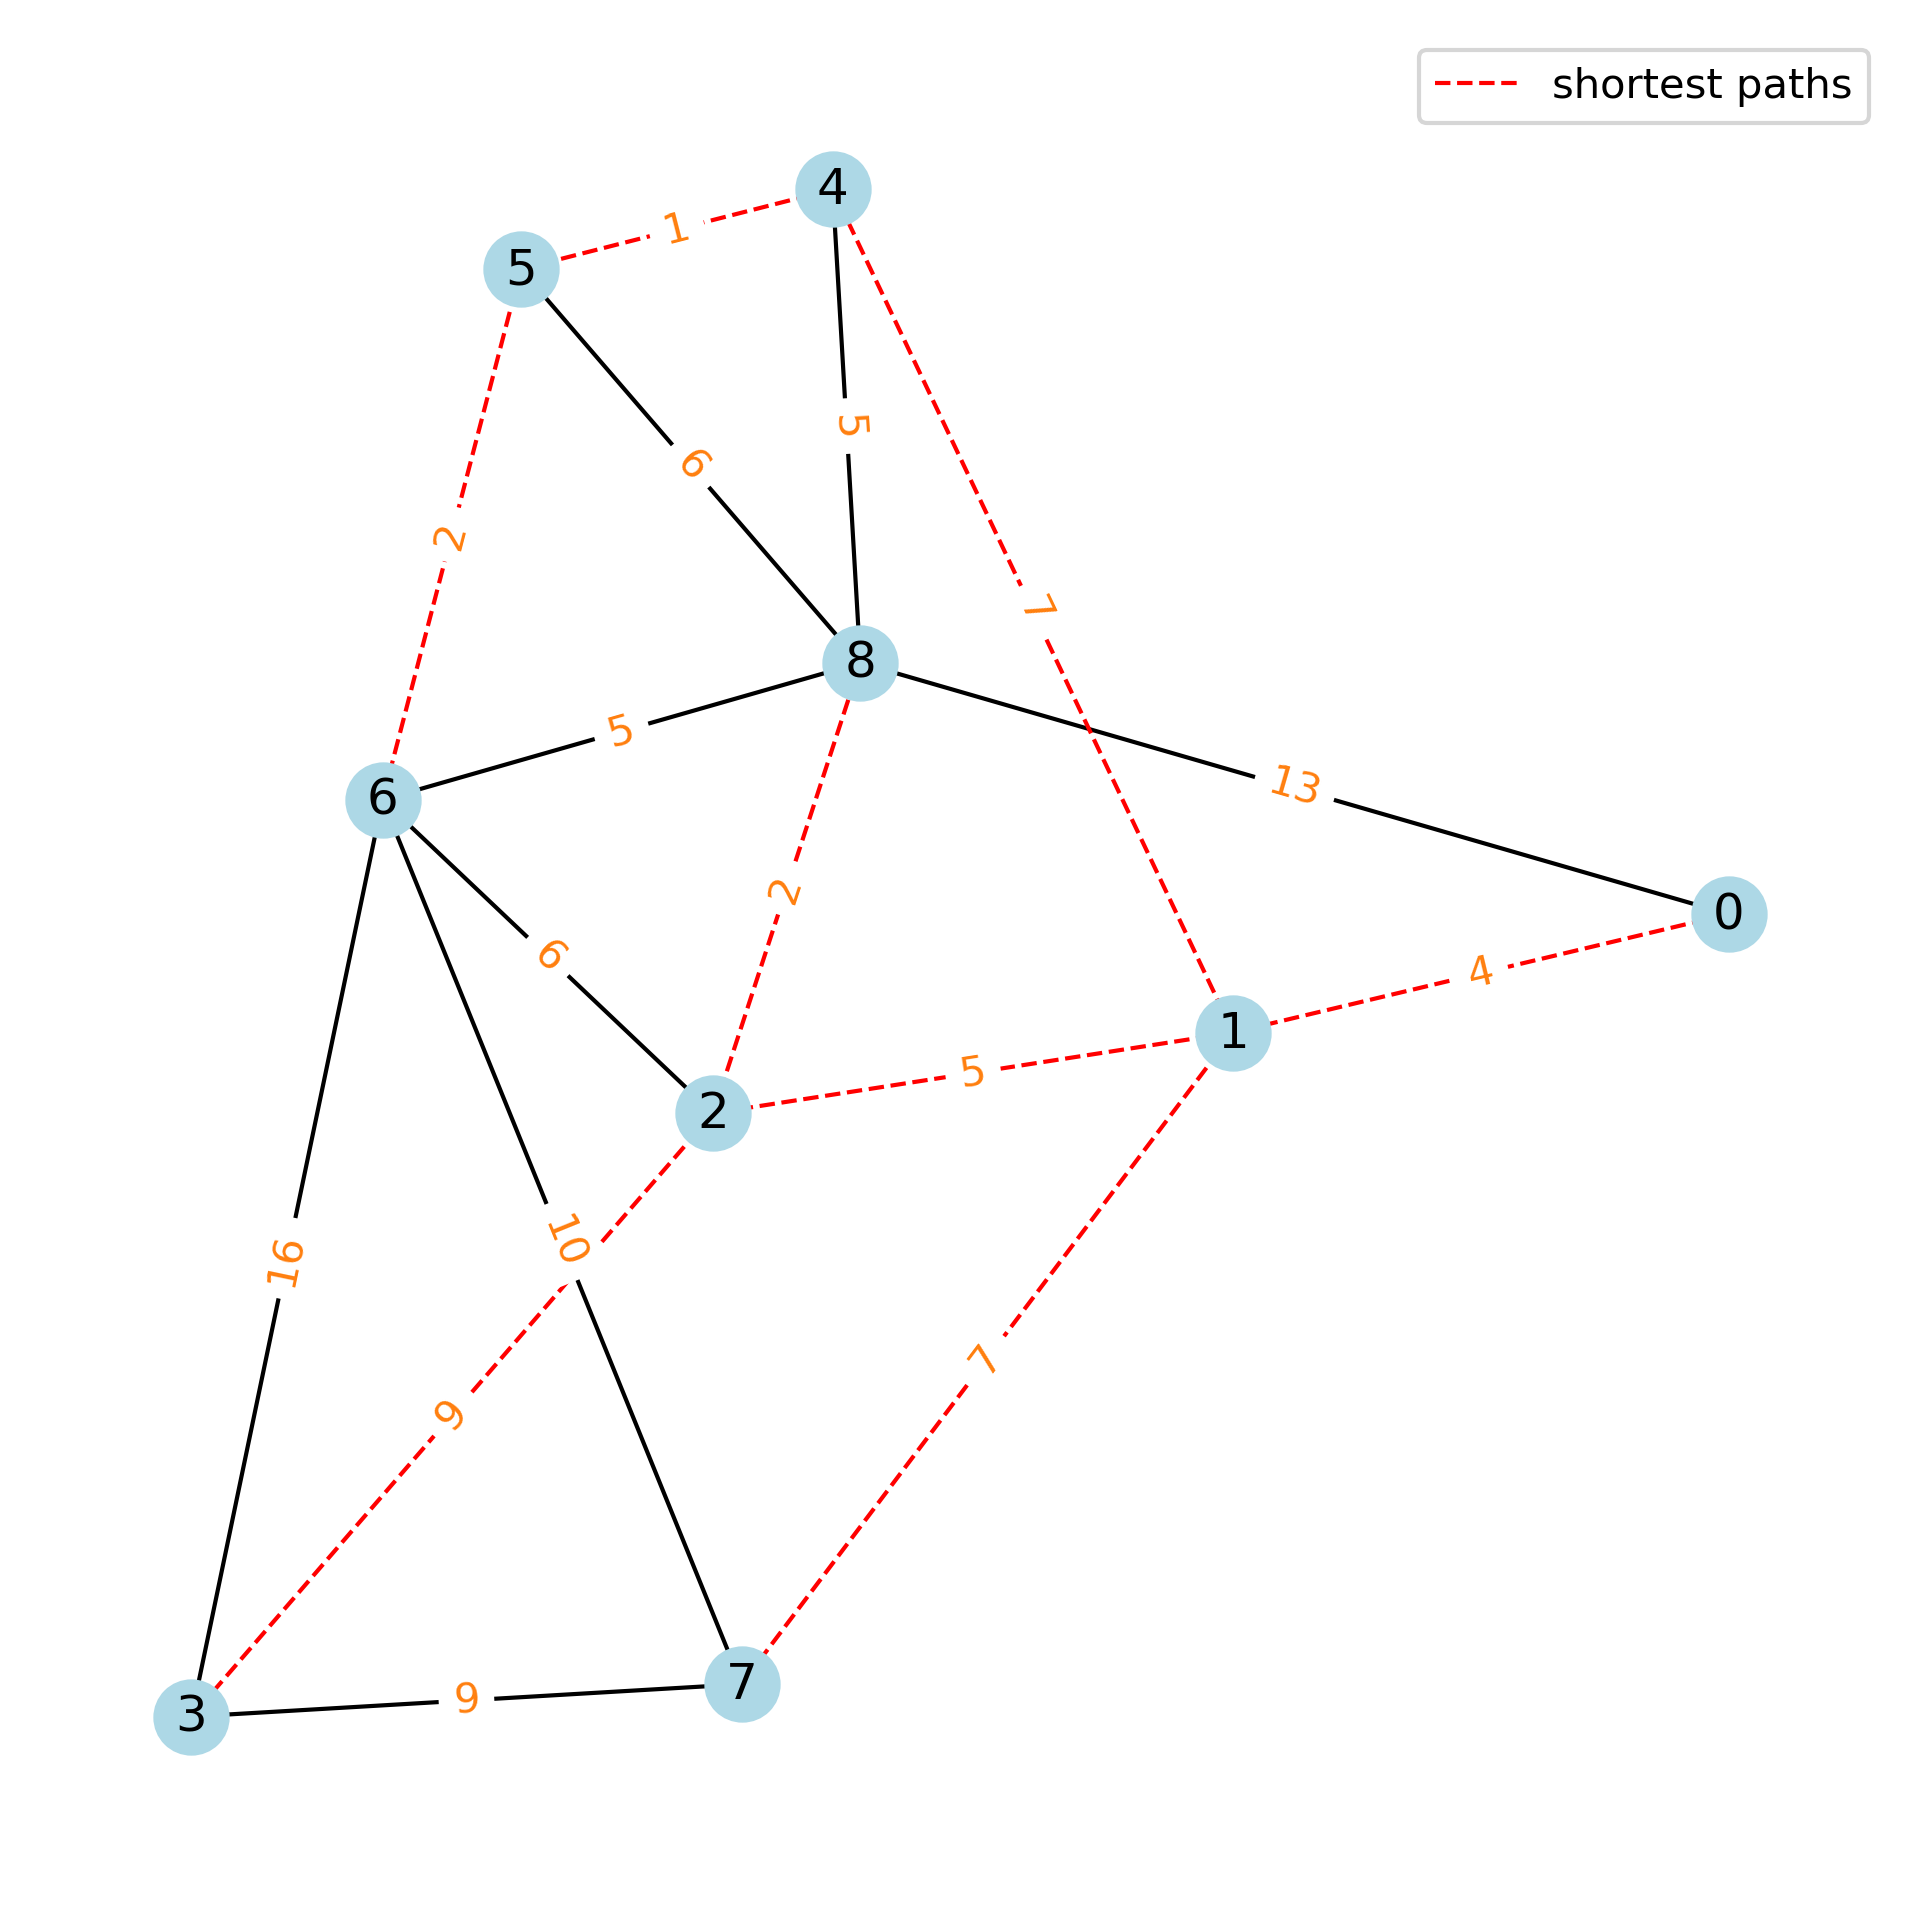

In [93]:
# D, PI = dijkstra(G, 0)
D, PI = first_attempt(G, 0)

draw_graph(G, PI)